### IMPORT LIBRARY
Pada bagian ini, kita mengimpor berbagai library yang diperlukan untuk proses analisis data dan pembangunan model machine learning.
- pandas dan numpy digunakan untuk manipulasi data.
- sklearn digunakan untuk pembagian data, pemodelan, dan evaluasi.
- matplotlib.pyplot dan seaborn digunakan untuk visualisasi data.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data
Dataset diabetes.csv dimuat ke dalam variabel df menggunakan fungsi pd.read_csv(). Dataset ini berisi informasi medis pasien seperti kadar glukosa, tekanan darah, BMI, dan variabel lainnya yang digunakan untuk memprediksi kemungkinan seseorang menderita diabetes (Outcome).

In [2]:
df = pd.read_csv("diabetes.csv")

### EDA
Pada tahap ini, dilakukan peninjauan awal terhadap data seperti melihat beberapa baris teratas, memeriksa tipe data dan jumlah nilai non-null, serta melihat statistik deskriptif untuk memahami distribusi dan karakteristik setiap fitur.

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


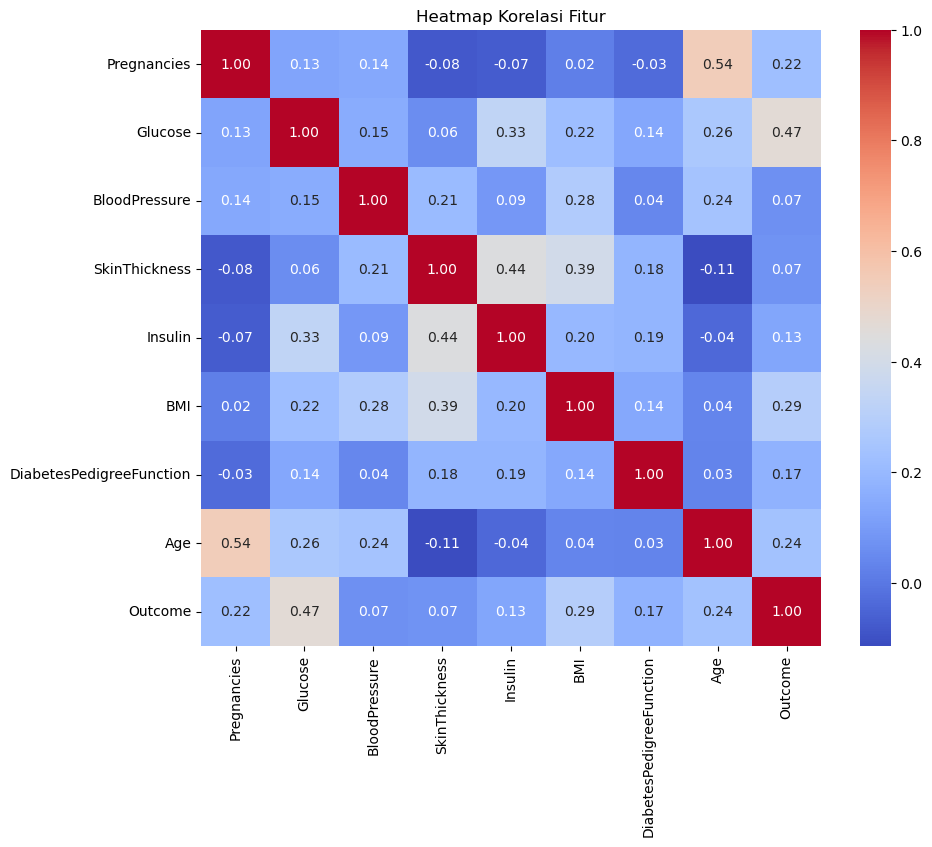

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur')
plt.show()

## Korelasi Fitur
Visualisasi heatmap korelasi digunakan untuk memahami hubungan antar fitur dalam dataset. Beberapa insight yang diperoleh dari heatmap:

Glucose menunjukkan korelasi paling kuat terhadap Outcome (0.47), menandakan bahwa kadar glukosa darah sangat berpengaruh terhadap kemungkinan diabetes.

Fitur BMI (Body Mass Index) dan Age juga memiliki korelasi moderat terhadap Outcome (masing-masing 0.29 dan 0.24).

Beberapa fitur seperti SkinThickness, BloodPressure, dan Insulin memiliki korelasi yang relatif rendah terhadap Outcome.

Informasi ini dapat digunakan sebagai dasar untuk melakukan seleksi fitur (feature selection), terutama jika ingin menyederhanakan model.

### Data Preparation
Pada tahap ini, dilakukan pembersihan data untuk mengatasi nilai 0 pada fitur medis, Nilai tersebut diganti dengan NaN dan kemudian diimputasi menggunakan nilai median agar data tetap representatif dan tidak terdistorsi oleh outlier

In [8]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    df[col].replace(0, np.nan, inplace=True)

df.fillna(df.median(), inplace=True)

### Split Dataset

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Prediction and Evaluation
Evaluasi ini memberikan gambaran seberapa baik model memprediksi kemungkinan diabetes berdasarkan fitur medis yang tersedia.


Akurasi: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:


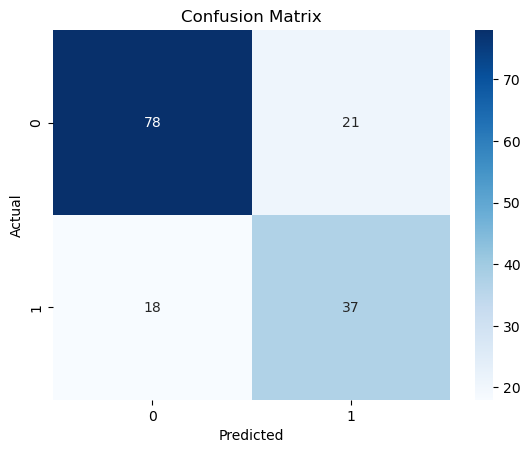

In [11]:
y_pred = model.predict(X_test)

print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Confusion Matrix
Evaluasi model dilakukan untuk mengetahui seberapa baik performa model klasifikasi yang dibangun. Berdasarkan Confusion Matrix dan Classification Report:

Akurasi model adalah 74.68%

Model berhasil mengenali:

78 pasien yang benar-benar tidak diabetes (True Negative)

37 pasien yang benar-benar diabetes (True Positive)

Model keliru memprediksi:

21 pasien sebagai tidak diabetes padahal sebenarnya diabetes (False Negative)

18 pasien sebagai diabetes padahal sebenarnya tidak diabetes (False Positive)

Insight penting: Model ini lebih baik dalam mengenali pasien non-diabetes daripada pasien yang positif diabetes, ditunjukkan oleh nilai recall yang lebih tinggi pada kelas 0. Namun, tingkat False Negative masih cukup tinggi (21 kasus), yang bisa berisiko dalam konteks medis karena pasien sebenarnya positif tapi tidak terdeteksi.

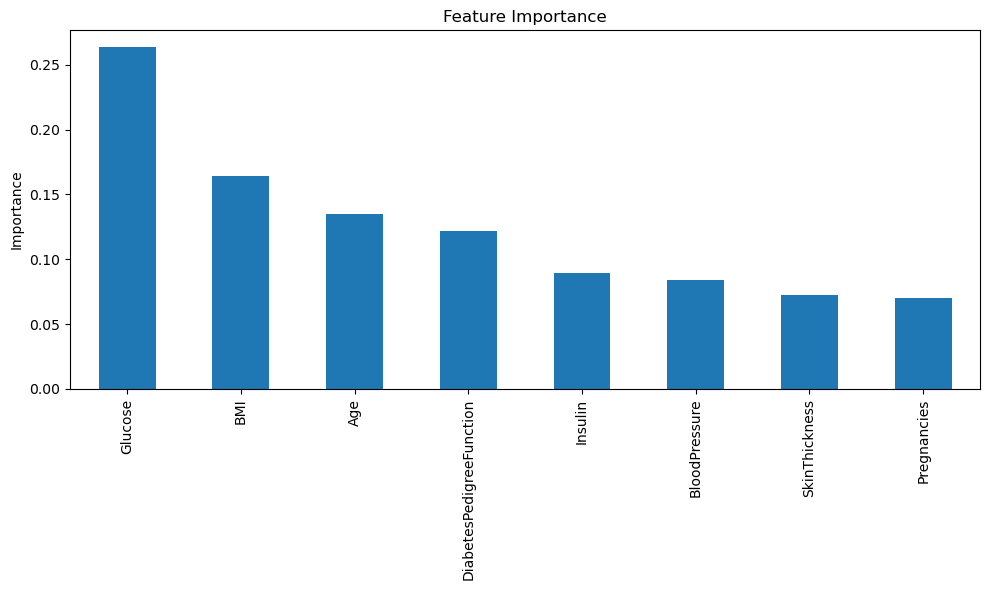

In [12]:
importances = model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

## Feature Importance
Visualisasi feature importance memberikan gambaran tentang fitur mana yang paling berpengaruh dalam membuat prediksi:

Glucose menjadi fitur paling penting dalam model, diikuti oleh BMI dan Age.

Fitur-fitur seperti Pregnancies, SkinThickness, dan BloodPressure memiliki kontribusi lebih kecil.

Kesimpulan: Fitur Glucose menjadi penentu utama dalam memprediksi diabetes dalam model ini, selaras dengan hasil korelasi sebelumnya. Fitur-fitur dengan importance rendah dapat menjadi pertimbangan untuk dieksplorasi lebih lanjut atau bahkan dieliminasi untuk efisiensi.